## 531 Quiz 2

### Lecture 5

#### Required readings

#### Section 18 Handling overlapping points

**Overplotting** (plotting many points on top of each other)
- We often experience the challenge that simple x-y scatter plots do not work very well because many points lie on top of each other and partially or fully overlap.
    - Partial transparency
    - Jittering (displacing each point randomly by a small amount in either the x or the y direction or both.)<br>
      -> It changes the data and therefore has to be performed with care
    - 2D histogram: When there are too many points overlapped to each other<br>
      -> binning: Bin the data in two dimension. Count how many observations fall into each square, and then color the rectangles by that count.<br>
      -> square or hexagon: hexagon represents the data slightly more accurately.
    - Contour lines: estimate the point density across the plot area and indicate regions of different point densities with contour lines.<br>
      -> Works well when the plot density changes slowly across both the x and the y dimensions.<br>
      -> Powerful strategy for showing the distributions of several point clouds at once<br>
      -> but it only works well when the number of groups with distinct colors is small and the groups are clearly separated.<br>
      -> Draw the contour lines for each group in its own plot panel.

#### Section 22 Titles, captions

**Titles**
- Purpose
    - convey information and make a point
    - place the data into context and provide accompanying titles, captions, and other annotations.

- Every figure needs the title.
- If your document layout uses caption blocks underneath each figure, then place the figure titles as the first element of each caption block.


**Axis and legend titles**
- Explain what the displayed data values are and how they map to plot aesthetics.
- For all numerical variables, the relevant titles shows the variables and the unites
- When the labels themselves are fully explanatory, then axis or legend titles can be omitted.
- Pie charts, treemaps don't have explicit axes.

#### Section 24 Use larger axis labels

- Pay attention to your axis labels, axis tick labels, and other assorted plot annotations.
- Keep the size of the labels and the size of the plot figure balanced.

In [101]:
# Run this cell to ensure that altair plots show up in the exported HTML
# and that the R cell magic works
import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

# Load the R cell magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [30]:
%%R -o diamonds
# Copy diamonds df from R to Python
library(tidyverse)

### 1. Follow guidelines for best practices in visualization design.

### 2. Avoid overplotting via 2D distribution plots.

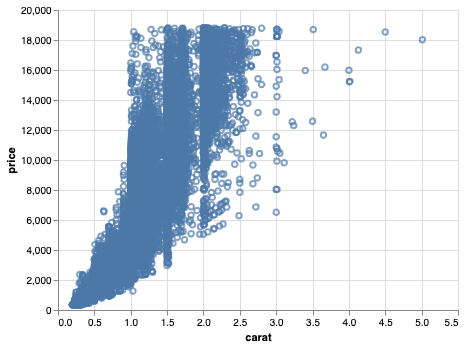

In [31]:
alt.Chart(diamonds).mark_point().encode(
    alt.X('carat'),
    alt.Y('price'))

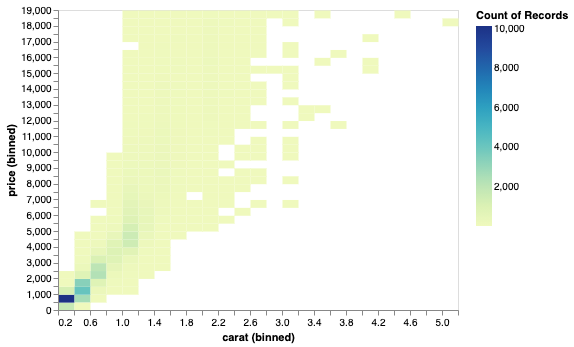

In [32]:
alt.Chart(diamonds).mark_rect().encode(
    alt.X('carat', bin=alt.Bin(maxbins=40)),
    alt.Y('price', bin=alt.Bin(maxbins=40)),
    alt.Color('count()'))

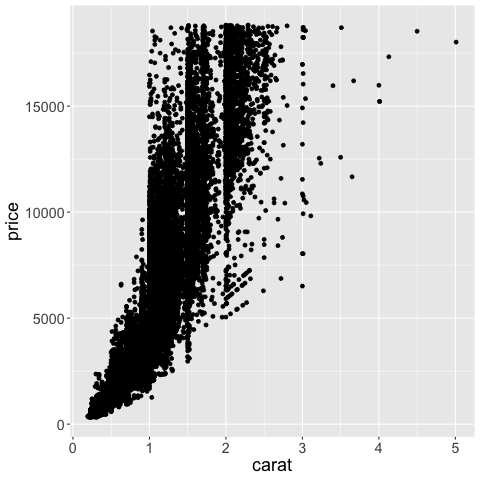

In [33]:
%%R
library(tidyverse)
theme_set(theme(text = element_text(size = 18)))

ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_point()

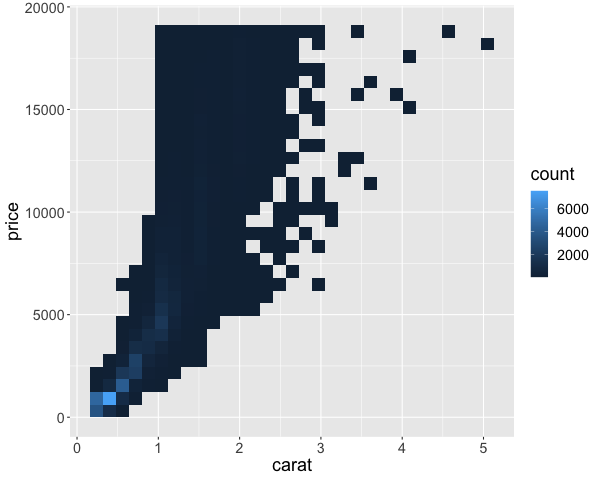

In [34]:
%%R -w 600
library(tidyverse)
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_bin2d() # or geom_hex() for hexagonal bins

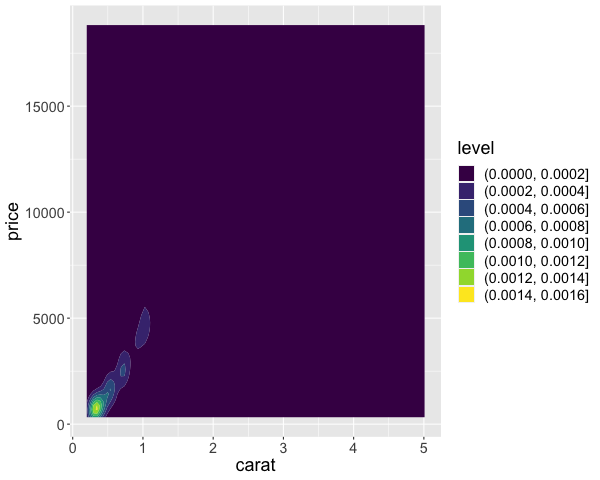

In [35]:
%%R -w 600
# 2D KDE
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_density_2d_filled()

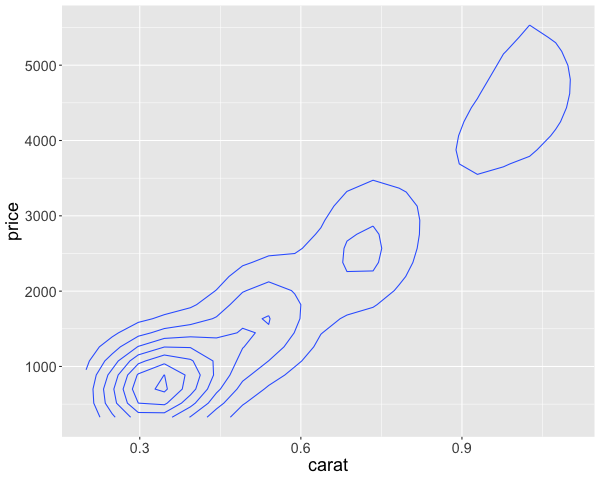

In [36]:
%%R -w 600
# topographic map
# small circles indicates sharp peaks
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_density_2d()

### 3. Adjust axes extents and formatting.

#### 3.1. Adjusting axes

- `domain` parameter to `alt.Scale` (we need to include `clip=True` so that the plot outside of the axis can be clipped.

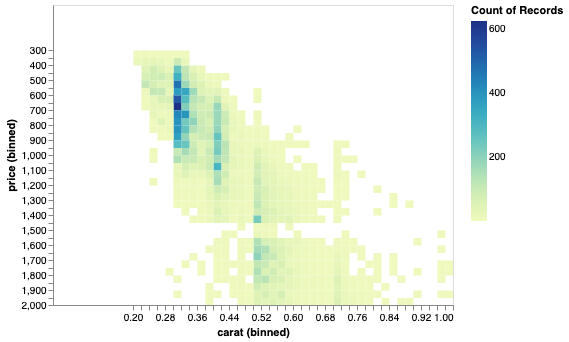

In [41]:
# Mention filter data, clip, maxbins
alt.Chart(diamonds).mark_rect(clip=True).encode(
    alt.X('carat', bin=alt.Bin(maxbins=400), scale=alt.Scale(domain=(0, 1))),
    alt.Y('price', bin=alt.Bin(maxbins=400), scale=alt.Scale(domain=(0, 2000), reverse=True)), # reverse the scale,
    alt.Color('count()'))

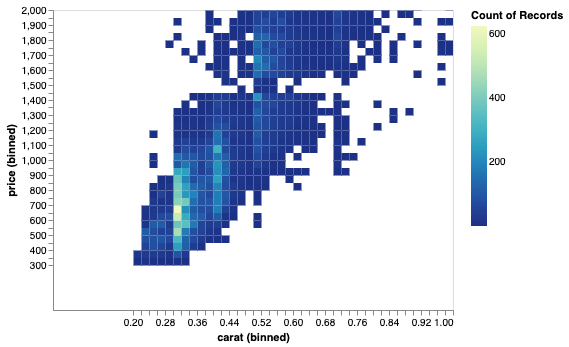

In [42]:
# Invert
alt.Chart(diamonds).mark_rect(clip=True).encode(
    alt.X('carat', bin=alt.Bin(maxbins=400), scale=alt.Scale(domain=(0, 1))),
    alt.Y('price', bin=alt.Bin(maxbins=400), scale=alt.Scale(domain=(0, 2000))),
    alt.Color('count()', scale=alt.Scale(reverse=True))) # reverse the color scale

By deafut ggplot removes observations ouside the visible domain, so any big marks that are both inside and outside, such as bars for example, will be cut out. 

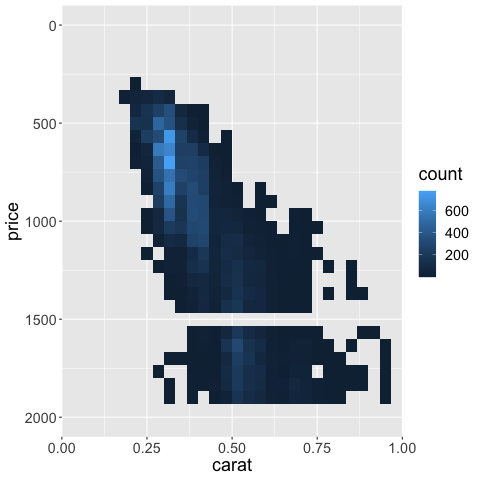

In [43]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_bin2d() +
    scale_x_continuous(limits = c(0, 1), expand = expansion(mult = c(0, 0))) + # If you want to remove the paddings on each side of the x-axis
    scale_y_continuous(limits = c(2000, 0), trans = 'reverse')   # reversing - needs to reverse the scale and specify trans = 'reverse'

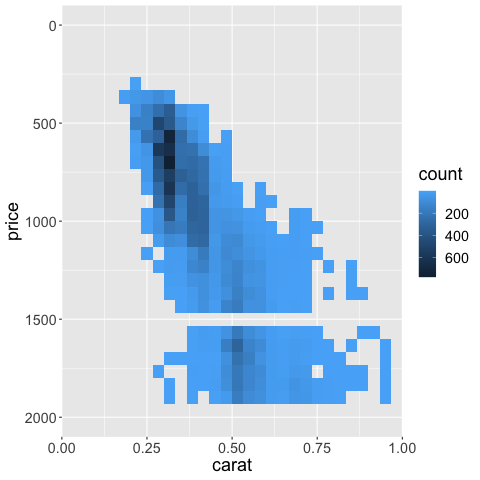

In [44]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_bin2d() +
    scale_x_continuous(limits = c(0, 1), expand = expansion(mult = c(0, 0))) +
    scale_y_continuous(limits = c(2000, 0), trans = 'reverse') +
    scale_fill_continuous(trans = 'reverse') # color reversing

#### 3.2. Axis label formatting

| Format | Description                       |
|--------|-----------------------------------|
| 'e'    | Scientific notation (10^ or e+)   |
| 's'    | Standard international units (SI) |
| '~'    | Removing trailing zeros           |
| '$'    | Dollar sign                       |

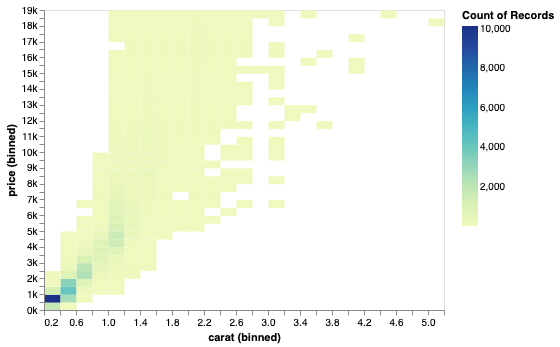

In [45]:
alt.Chart(diamonds).mark_rect().encode(
    alt.X('carat', bin=alt.Bin(maxbins=40)),
    alt.Y('price', bin=alt.Bin(maxbins=40), axis=alt.Axis(format='~s', tickCount=1)),  # ~ for removing trailing zeros
    alt.Color('count()'))

* `TickCount` can modify the number of ticks, except for binned data.

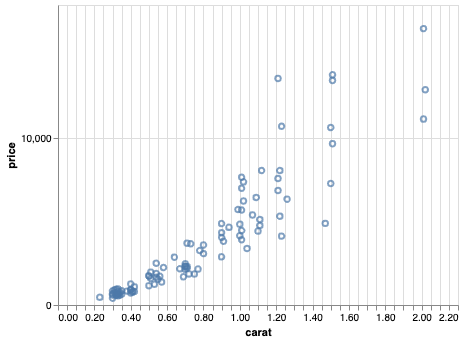

In [46]:
alt.Chart(diamonds.sample(100)).mark_point().encode(
    alt.X('carat', axis=alt.Axis(tickCount=40)),
    alt.Y('price', axis=alt.Axis(tickCount=2)))

* Removing axis

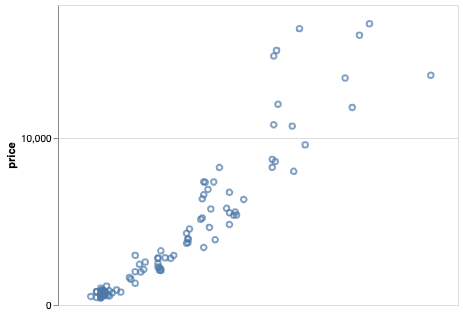

In [47]:
alt.Chart(diamonds.sample(100)).mark_point().encode(
    alt.X('carat', axis=None),
    alt.Y('price', axis=alt.Axis(tickCount=2)))

* Setting a different theme

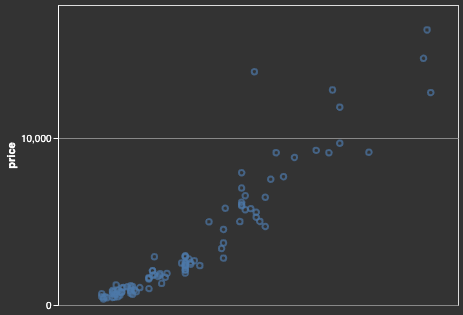

In [48]:
alt.themes.enable('dark')
alt.Chart(diamonds.sample(100)).mark_point().encode(
    alt.X('carat', axis=None),
    alt.Y('price', axis=alt.Axis(tickCount=2)))

* ggplot `scales` packages

| Format | Description                       |
|--------|-----------------------------------|
| scales::label_scientific()    | Scientific notation (10^ or e+)   |
| scales::label_number_si()    | Standard international units (SI) |
| scales::label_dollar()    | Dollar sign                       |

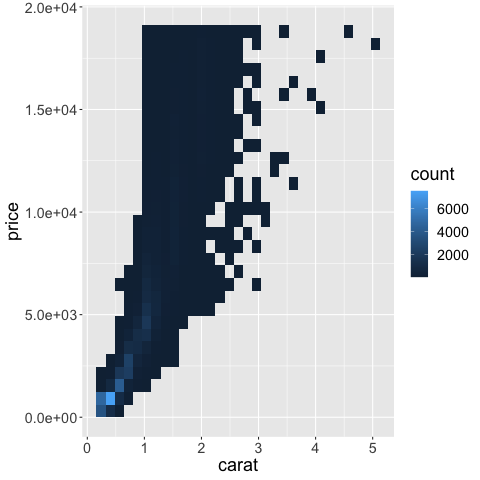

In [49]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_bin2d() +
    scale_y_continuous(labels = scales::label_scientific())

* Setting the number of ticks on axis

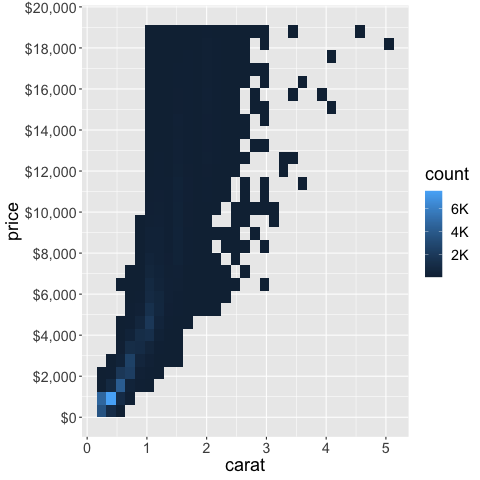

In [50]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_bin2d() +
    scale_y_continuous(
        labels = scales::label_dollar(),
        breaks = scales::pretty_breaks(n = 10)) +
    scale_fill_continuous(labels = scales::label_number_si())

* removing axis

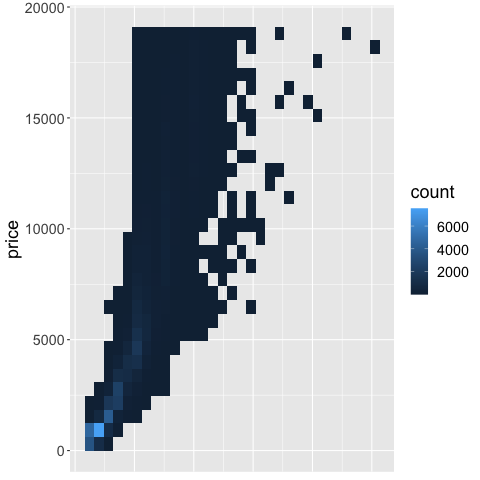

In [51]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_bin2d() +
    theme(axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank())

* theme_void(): hides all axis objects.

### 4. Modify titles of several figure elements.

#### 4.1. Altair
- Axis titles should be capitalized and contain spaces, no variable names with underscores.

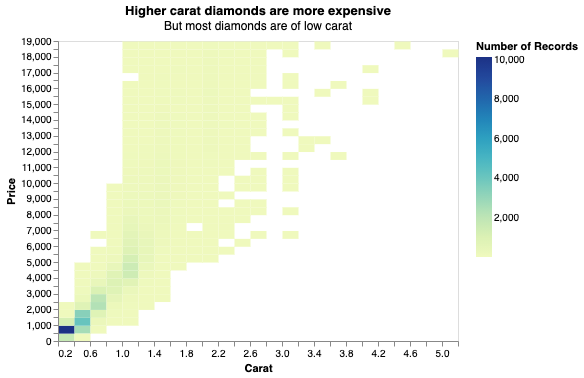

In [53]:
alt.themes.enable('default')
(alt.Chart(
    diamonds,
    title=alt.TitleParams(
        text='Higher carat diamonds are more expensive',     # title
        subtitle='But most diamonds are of low carat'))      # subtitle
 .mark_rect().encode(
    alt.X('carat', bin=alt.Bin(maxbins=40), title='Carat'),  # x-axis title
    alt.Y('price', bin=alt.Bin(maxbins=40), title='Price'),  # y-axis title
    alt.Color('count()', title='Number of Records')))        # legend title

#### 4.2. ggplot
- Titles can be specified in `labs()`

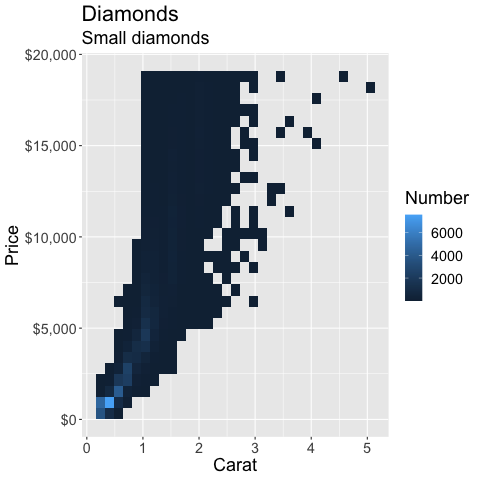

In [54]:
%%R
ggplot(diamonds) +
    aes(x = carat,
        y = price) +
    geom_bin2d() +
    labs(x = 'Carat', y = 'Price', fill = 'Number', title = 'Diamonds', subtitle='Small diamonds') +
    scale_y_continuous(labels = scales::label_dollar())

### Lecture 6

#### Required readings

#### Section 4 Color scales

1. Color as a tool to distinguish
- Qualitative color scale
    - A finite set of specific colors that are chosen to look clearly distinct from each other while also being equivalent to each other.
    - The color should not create the impression of an order

2. Color to represent data values
- Sequential color scale
    - Contains a sequence of colors that clearly indicate which values are larger or smaller
    - How distant two specific values are from each other
- Needs to be perceived to vary uniformly across its entire range.
- Based on single hue or multiple hue
- Ex) show how the data values vary across geographic regions
- Diverging color scale
    - Visualize the deviation of data values in one of two directions relative to a neutral midpoint.
    - Diverging scales need to be balanced.

3. Color as a tool to highlight
- Accent color scales
- Color a certain figure element in a color that vividly stand out against the rest of the figure.
- Remove all color from all elements in the figure except the highlighted data categories or points.

#### Section 19 Common pitfalls of color use

- poor color choices can ruin an otherwise excellent visualization

1. Giving color a job that is too big for it to handle, by encoding too many different items in different colors.
- Qualitative color scales work best when there are three to five different categories that need to be colored

2. Coloring for the sake of coloring, without having a clear purpose for the colors.
- Avoid overly saturated colors.
- Example: Rainbow color scale.
    - The scale is circular: the extreme values seem to be similar
    - Highly non-monotonic
    - Obscure data features and/or highlight arbitrary aspects of the data
    - overly saturated.

3. Not designing for color-vision deficiency
- Keep in mind that a good proportion of our readers may have some form of color-vision deficiency. 
    - ex) red-green, blue-green.
- Keep the right size of the colored graphical elements so that they can be easily distinguishable. 

### 1. Choose appropriate color schemes for your data.

In [55]:
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

# Load the R cell magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


1. Continuous data - uniform colormap such as viridis is often the most suitable choice.
- This type of colormap ensures that equal steps in data are perceived as equal steps in color space.
- colormaps with monotonically increasing lightness throughout the colormap will be easier to interpret for the viewer. 

2. Nearly 10% of the population is colour vision deficient
- Guidelines for making your visualizations more accessible to those with reduced color vision, will in many cases also improve the interpretability of your graphs for people who have standard color vision. 
- A colormap designed specifically to look the same for people with and without the most common color vision deficiency is cividis.
- In addition to careful color choices, visualization clarity can be improved by using different shapes for each grouping.

3. The jet rainbow colormap should be avoided
- the sharp transitions between colors introduces visual threshold that do not represent the underlying continuous data. 
- luminance (brightness)
    - For example, your eye is drawn to the yellow and cyan regions, because the luminance is higher. 
    - This can have the unfortunate effect of highlighting features in your data that don't exist, misleading your viewers! 
    - Since higher values are not always lighter, this means that your graph is not going to translate well to greyscale. 
- A better alternative : the turbo rainbow color scheme

### 2. Use pre-made and custom color schemes.

#### 2.1. Categorical

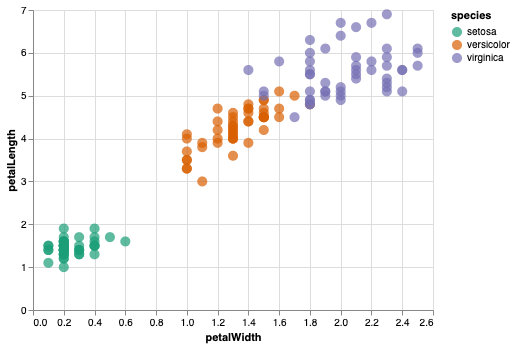

In [102]:
from vega_datasets import data
iris = data.iris()

alt.Chart(iris).mark_circle(size=100).encode(
    x='petalWidth',
    y='petalLength',
    color=alt.Color('species', scale=alt.Scale(scheme='dark2'))) # accent, category10, paried, pastel1, ...

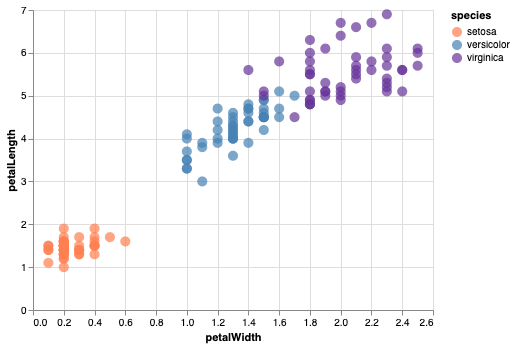

In [103]:
colors = ['coral', 'steelblue', 'rebeccapurple']
alt.Chart(iris).mark_circle(size=100).encode(
    x='petalWidth',
    y='petalLength',
    color=alt.Color('species', scale=alt.Scale(range=colors)))   # custom color palette

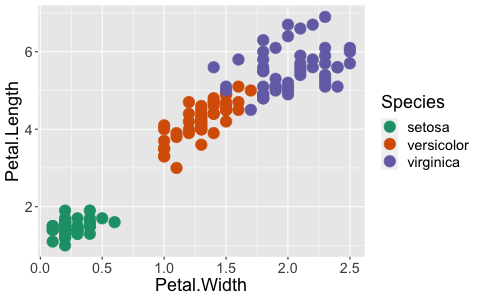

In [58]:
%%R -h 300
ggplot(iris) + 
    aes(x = Petal.Width,
        y = Petal.Length,
        color = Species) +
    geom_point(size = 5) +
    scale_color_brewer(palette = 'Dark2')

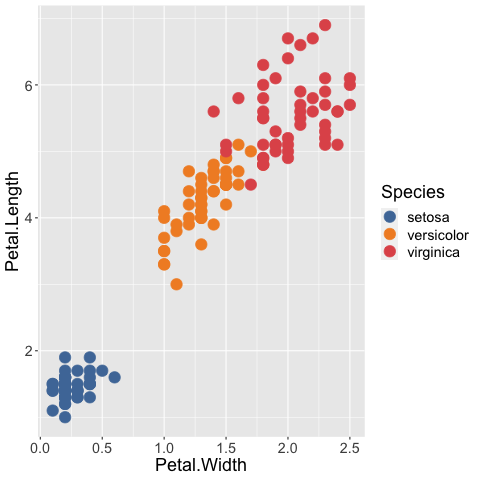

In [59]:
%%R
ggplot(iris) + 
    aes(x = Petal.Width,
        y = Petal.Length,
        color = Species) +
    geom_point(size = 5) +
    ggthemes::scale_color_tableau()

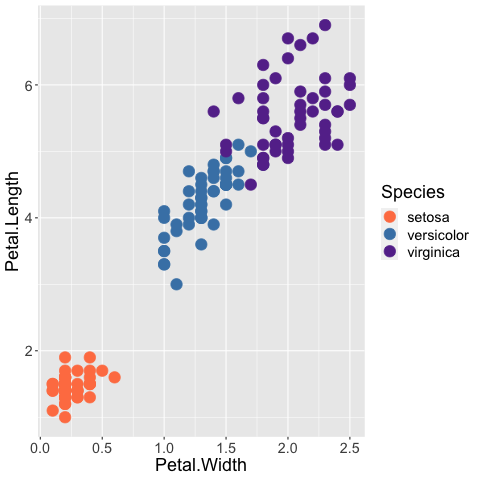

In [60]:
%%R
ggplot(iris) + 
    aes(x = Petal.Width,
        y = Petal.Length,
        color = Species) +
    geom_point(size = 5) +
    scale_color_manual(values = c('#FF7F50', '#4682B4', '#663399'))    # manual palette

#### 4.2. Sequential
- It is a good idea to have the low values be the ones closest to the background color.

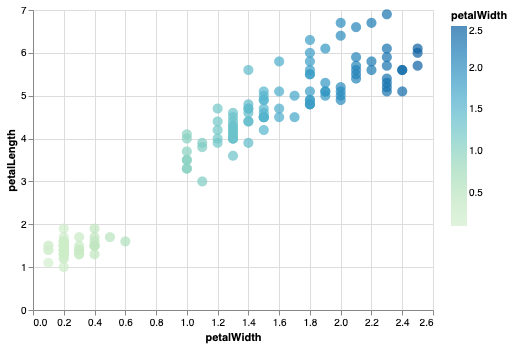

In [61]:
alt.Chart(iris).mark_circle(size=100).encode(
    x='petalWidth',
    y='petalLength',
    color=alt.Color('petalWidth', scale=alt.Scale(scheme='greenblue')))

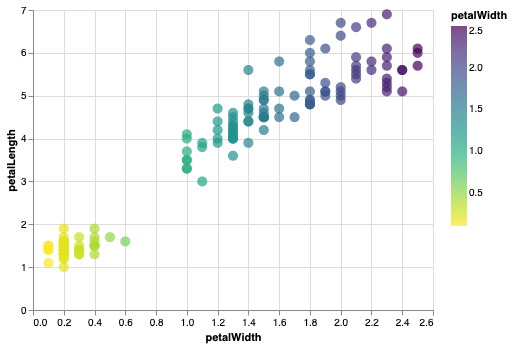

In [62]:
alt.Chart(iris).mark_circle(size=100).encode(
    x='petalWidth',
    y='petalLength',
    color=alt.Color('petalWidth', scale=alt.Scale(scheme='viridis', reverse=True)))  # reversing the color scale

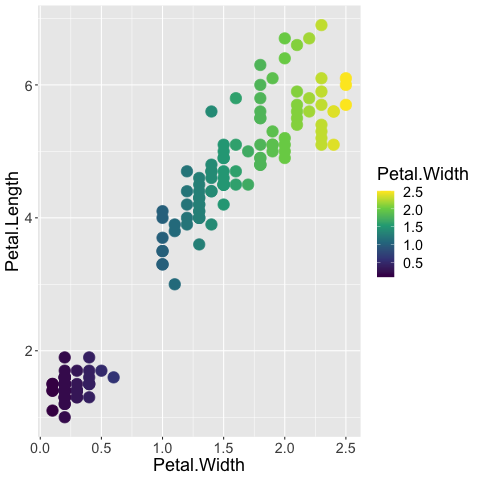

In [63]:
%%R
ggplot(iris) + 
    aes(x = Petal.Width,
        y = Petal.Length,
        color = Petal.Width) +
    geom_point(size = 5) +
    scale_color_viridis_c()

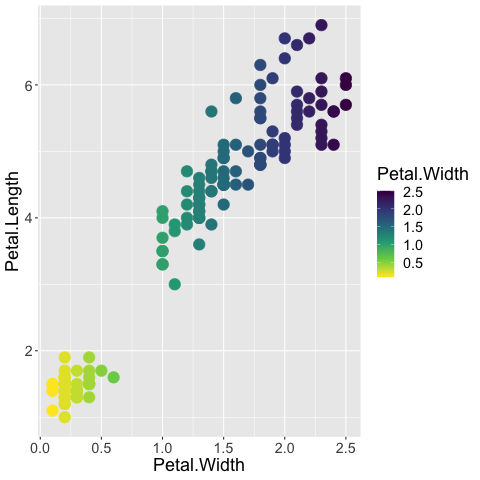

In [64]:
%%R
ggplot(iris) + 
    aes(x = Petal.Width,
        y = Petal.Length,
        color = Petal.Width) +
    geom_point(size = 5) +
    scale_color_viridis_c(direction = -1)   # reversing the color scale

#### 4.3. Altair-Diverging

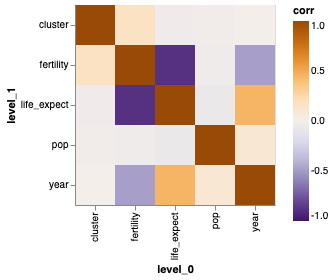

In [104]:
corr_df = data.gapminder().corr().stack().reset_index(name='corr')
(alt.Chart(corr_df).mark_rect().encode(
    x='level_0',
    y='level_1',
    tooltip='corr',
    color=alt.Color('corr', scale=alt.Scale(domain=(-1, 1), scheme='purpleorange')))  # define the color domain manually to match the range of our variable.
 .properties(width=200, height=200))

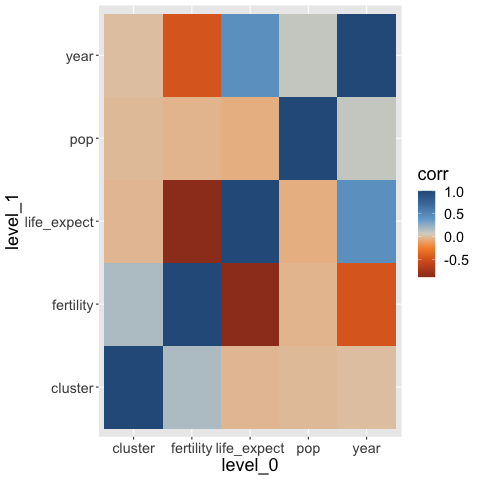

In [66]:
%%R -i corr_df
ggplot(corr_df) +
    aes(x = level_0,
        y = level_1,
        fill = corr) +
    geom_tile() +
    ggthemes::scale_fill_gradient2_tableau()

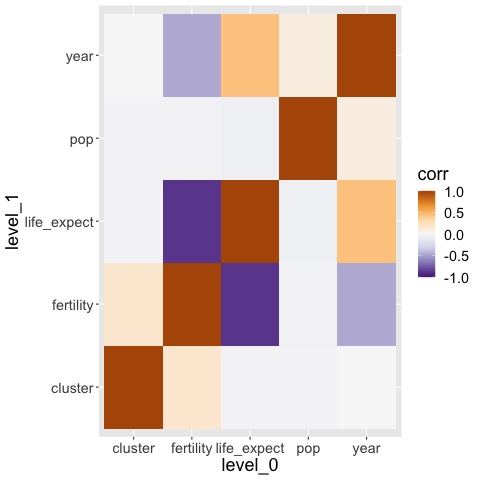

In [67]:
%%R -i corr_df
ggplot(corr_df) +
    aes(x = level_0,
        y = level_1,
        fill = corr) +
    geom_tile() +
    scale_fill_distiller(palette = 'PuOr', limits = c(-1, 1))   # distiller for diverging scale
                                                                # put limits for highlighting the magnitude equally

### 3. Selectively highlight and annotate data with color and text.

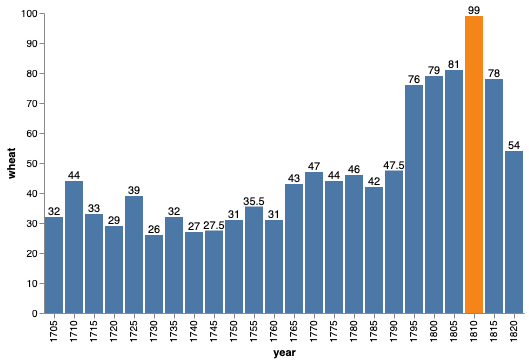

In [68]:
wheat = data.wheat().query("year > 1700")  # Reduce the number of bars for clarity

# Set the year to be highlighted to a separate value in a new column
wheat["highlight"] = False
wheat.loc[wheat["year"] == 1810, "highlight"] = True

bars = (
    alt.Chart(wheat)
    .mark_bar()
    .encode(
        x="year:O",
        y=alt.Y("wheat", axis=alt.Axis(grid=False)),  # remove grid
        color=alt.Color("highlight", legend=None),
    )
)

(
    bars
    + bars.mark_text(dy=-5).encode(
        text="wheat", color=alt.value("black")  # set the text color black
    )  
).configure_view(strokeWidth=0)   # remove gridlines

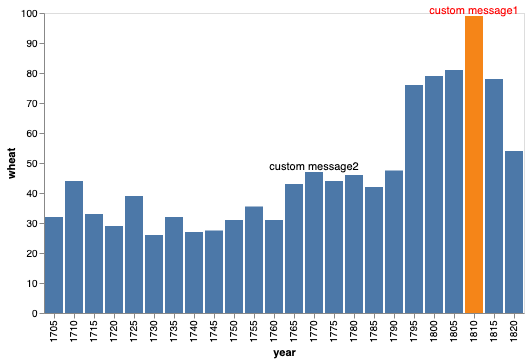

In [69]:
bars + alt.Chart(wheat.query("year == 1810")).mark_text(dy=-5).encode(
    x="year:O", y="wheat", text=alt.value("custom message1"), color=alt.value("red")   # annotate with a custom message
) + alt.Chart(wheat.query("year == 1770")).mark_text(dy=-5).encode(
    x="year:O", y="wheat", text=alt.value("custom message2")
)

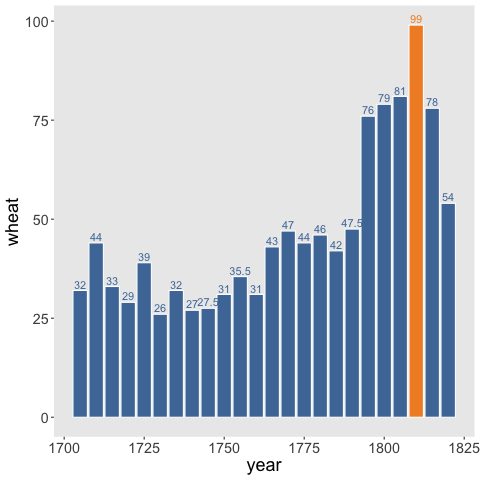

In [70]:
%%R -i wheat
ggplot(wheat) +   # use the highlight column 
    aes(x = year,
        y = wheat,
        fill = highlight,
        label = wheat,        # annotate w/ geom_text
        color = highlight) +  # choose the same color as the highlighted bars w/ scale_color_tableau()
    geom_bar(stat = 'identity', color = 'white') + 
    geom_text(vjust=-0.3) +  
    ggthemes::scale_fill_tableau() +
    ggthemes::scale_color_tableau() +
    theme(legend.position = 'none',
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank())  # remove grid lines

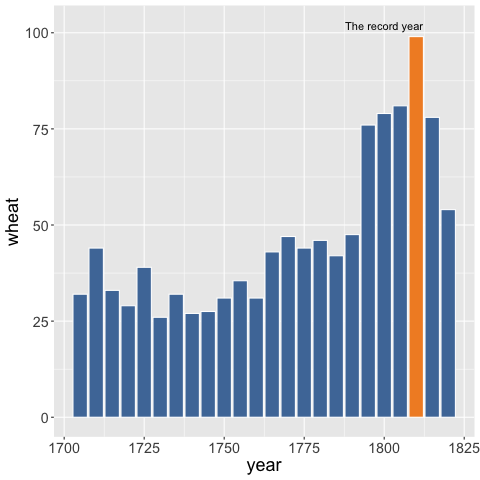

In [71]:
%%R
ggplot(wheat) +
    aes(x = year,
        y = wheat,
        fill = highlight) +
    geom_bar(stat = 'identity', color = 'white') + 
    annotate('text', label = 'The record year', x = 1800, y = 102) +   # use annotate() to annotate a custom message
    ggthemes::scale_fill_tableau() +
    theme(legend.position = 'none')

### 4. Directly label data instead of using legends.

- Labeling data with wrangling

In [105]:
stocks = data.stocks()

stock_order = (
    stocks
    .loc[stocks['date'] == stocks['date'].max()]
    .sort_values('price', ascending=False))
stock_order

,symbol,date,price
436,GOOG,2010-03-01,560.19
559,AAPL,2010-03-01,223.02
245,AMZN,2010-03-01,128.82
368,IBM,2010-03-01,125.55
122,MSFT,2010-03-01,28.80


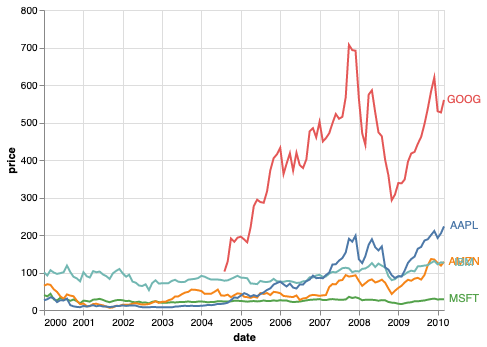

In [73]:
lines = alt.Chart(stocks).mark_line().encode(
    x='date',
    y='price',
    color=alt.Color('symbol', legend=None))

text = alt.Chart(stock_order).mark_text(dx=20).encode(
    x='date',
    y='price',
    text='symbol',
    color='symbol')

lines + text

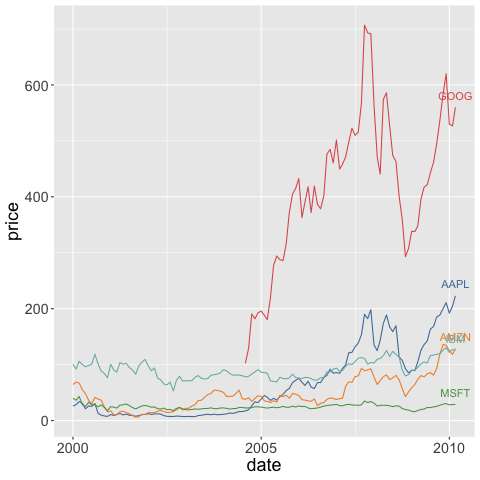

In [74]:
%%R -i stocks -i stock_order
ggplot(stocks) + 
    aes(x = date,
        y = price,
        color = symbol,
        label = symbol) +
    geom_line() +
    geom_text(data = stock_order, vjust=-1) +
    ggthemes::scale_color_tableau() +
    theme(legend.position = 'none')

### Lecture 7

#### Required readings

#### 14. Visualizing trends

- We are often more interested in the overarching trend of the data than in the specific detail of where each individual data point lies. 

##### 14.1 Smoothing
- The act of smoothing produces a function that captures key patterns in the data while removing irrelevant minor detail or noise.
- Moving average
    - The most simplistic approach to smoothing
    - It results in a smoothed curve that is shorter than the original curve
    - Even with a large averaging window, a moving average is not necessarily that smooth
- LOESS
    - Fits low-degree polynomials to subsets of the data
    - the smoothness can be tuned by adjusting a parameter
    - Not limited to time series : can be applied to arbitrary scatter plot
    - required the fitting of many separate regression models
    - slow for large datasets
- Spline models
    - Faster than LOESS
    - If we fit a spline with k segments, then we need to specify k+1 knots.
    - The specific choice of the type of spline and number of knots used can result in widely different smoothing functions for the same data

##### 14.2.Showing trends with a defined functional form
- The behavior of general-purpose smoothers can be somewhat unpredictable for any given dataset.
- These smoothers also do not provide parameter estimates that have a meaningful interpretation.
- It is preferable to fit a curve with a specific functional form that is appropriate for the data and that uses parameters with clear meaning.
- Simple straight line is surprisingly common in real-world datasets.
- We need to guess what an appropriate functional form might be.
- It is usually better to fit a straight line to transformed data than to fit a nonlinear curve to untransformed data.

#### 16. Visualizing uncertainty

- Every data set we work with has some uncertainty
- Whether and how we choose to represent this uncertainty can make a major difference in how accurately our audience perceives the meaning of the data.
- Two commonly used approaches to indicate uncertainty are error bars and confidence bands.

##### 16.1 Frequency framing
- Visualize specific potential outcomes
- Discrete outcome visualization
<img src="https://clauswilke.com/dataviz/visualizing_uncertainty_files/figure-html/probability-waffle-1.png" width=500px>

- Combining the discrete outcome nature with a continuous distribution
<img src="https://clauswilke.com/dataviz/visualizing_uncertainty_files/figure-html/election-quantile-dot-1.png" width=500px>

##### 16.2 Uncertainty of point estimates
- Visualize with error bars
    - You must specify what quantity and/or confidence level the error bars represent.
    
<img src="https://clauswilke.com/dataviz/visualizing_uncertainty_files/figure-html/cocoa-data-vs-CI-1.png" width=500px>

- Graded errobars
    - Grading helps the reader perceive that there is a range of different possibilities.

<img src="https://clauswilke.com/dataviz/visualizing_uncertainty_files/figure-html/mean-chocolate-ratings-1.png" width=500px>

##### 16.3 Visualizing the uncertainty of curve fits
- Use the confidence band
- Applicable for non-linear curve fits.

<img src="https://clauswilke.com/dataviz/visualizing_uncertainty_files/figure-html/mpg-uncertain-1.png" width=500px>

##### 16.4 Hypothetical outcome plots
- All static visualizations of uncertainty suffer from the problem that viewers may interpret some aspect of the uncertainty visualization as a deterministic feature of the data (deterministic construal error). 
- We can avoid this problem by visualizing uncertainty through animation
    - by cycling through a number of different but equally likely plots
    - Hypothetical Outcome Plot or HOP.

In [75]:
%%R
library(tidyverse)

theme_set(theme_grey(base_size=18))

scores_raw <- read_csv('data/students-gapminder.csv')
colnames(scores_raw) <- c('time', 'student_score', 'estimated_score')
scores <- scores_raw %>%
    mutate(diff = student_score - estimated_score,
           estimation = case_when(
               diff == 0 ~ 'neutral',
               diff < 0 ~ 'negative',
               diff > 0 ~ 'positive')) %>%
    pivot_longer(!c(time, estimation, diff)) %>%
    arrange(desc(diff))
scores


── Column specification ────────────────────────────────────────────────────────
cols(
  Timestamp = col_character(),
  `Please enter how many questions you answered correctly on the test (0 - 13)` = col_double(),
  `What do you think the average score among all MDS students was (0 - 13)?` = col_double()
)

# A tibble: 146 x 5
   time                       diff estimation name            value
   <chr>                     <dbl> <chr>      <chr>           <dbl>
 1 2020/10/15 2:08:51 PM MDT     2 positive   student_score       9
 2 2020/10/15 2:08:51 PM MDT     2 positive   estimated_score     7
 3 2020/10/15 3:38:21 PM MDT     2 positive   student_score       8
 4 2020/10/15 3:38:21 PM MDT     2 positive   estimated_score     6
 5 2020/10/17 7:54:24 AM MDT     2 positive   student_score       9
 6 2020/10/17 7:54:24 AM MDT     2 positive   estimated_score     7
 7 2020/10/18 4:36:32 PM MDT     2 positive   student_score      10
 8 2020/10/18 4:36:32 PM MDT     2 positive   estimated_sc

### 1. Visualize pair-wise differences using a slope plot.

#### 1.1. ggplot

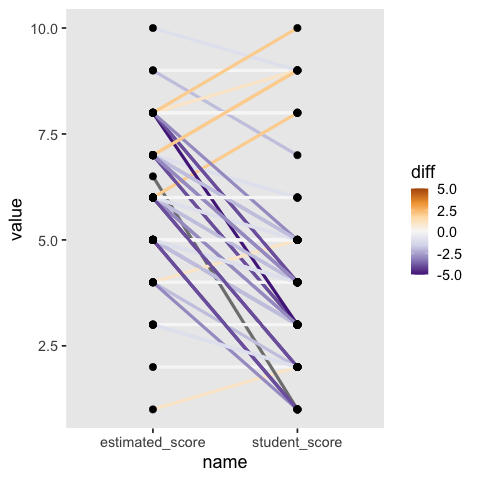

In [76]:
%%R -o scores
ggplot(scores) +
    aes(x = name,
        y = value,
       group = time) +   # group variable allows to visualize pair-wise differences
    geom_line(aes(color = diff), size = 1.5) + 
    geom_point(size=3) +
    scale_color_distiller(palette = 'PuOr', lim = c(-5, 5)) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank())

#### 1.2 Altair

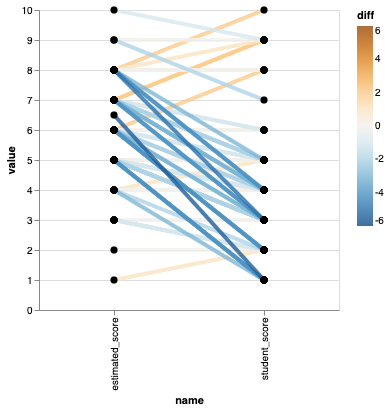

In [77]:
points = alt.Chart(scores).mark_circle(size=50, color='black', opacity=1).encode(
    alt.X('name'),
    alt.Y('value'),
    alt.Detail('time')).properties(width=300)    # This is the 'group' part in ggplot
points.mark_line(size=4, opacity=0.8).encode(alt.Color('diff', scale=alt.Scale(scheme='blueorange', domain=(-6, 6)))) + points

### 2. Visualize trends using regression and loess lines.

- Good highlight general trends in the data that can be hard to elucidate by looking at the raw data points.

**When to choose which trendline?**

- If it is important that the line has values that are **easy to interpret**, choose a rolling mean. 
    - These are also the most straightforward trendlines when communicating data to a general audience.
    
    
- If you think a **simple line equation** (e.g. linear) describes your data well, this can be advantageous since you would know that your data follows a set pattern, and it is easy to predict how the data behaves outside the values you have collected (of course still with more uncertainty the further away from your data you predict).


- If you are mainly interested in **highlighting a trend in the current data**, and **the two situations described above are not of great importance** for your figure, then a loess line could be sutiabe. 
    - It has the advantage that it describes trends in data very "naturally", meaning that it highlights patterns we would tend to highlight ourselves in qualitative assessment. 
    - It also less strict in its statistical assumption compared to e.g. a linear regression, so you don't have to worry about finding the correct equation for the line, and assessing whether your data truly follows that equation globally.

In [106]:
from vega_datasets import data

cars = data.cars()

#### 2.1 Altair

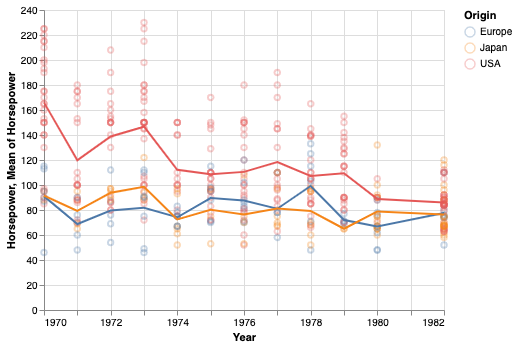

In [79]:
# trend line via calculating mean value

points = alt.Chart(cars).mark_point(opacity=0.3).encode(
    alt.X('Year'),
    alt.Y('Horsepower'),
    alt.Color('Origin')) 

points + points.encode(y='mean(Horsepower)').mark_line()

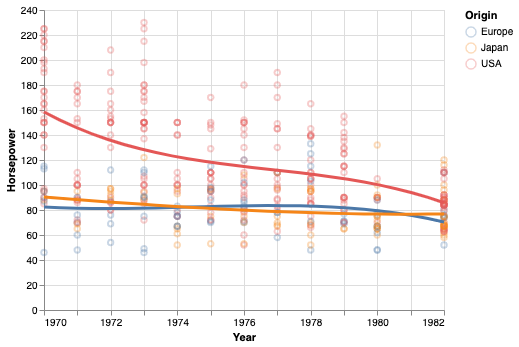

In [80]:
# trend line via regression

points +  points.transform_regression(
    'Year', 'Horsepower', groupby=['Origin'], method='poly').mark_line(size=3)    # default: linear regression

If it is difficult to find a single regressin equation that describes the entire data set
- fit multiple equations to samller subsets of the data
- and add them together to get the final line.
- LOESS

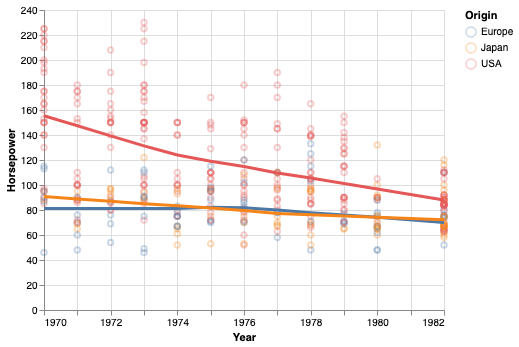

In [81]:
# The default is 0.3 and 1 is often close to a linear fit.
points +  points.transform_loess(
    'Year', 'Horsepower', groupby=['Origin'], bandwidth=0.8).mark_line(size=3)

#### 2.2 ggplot

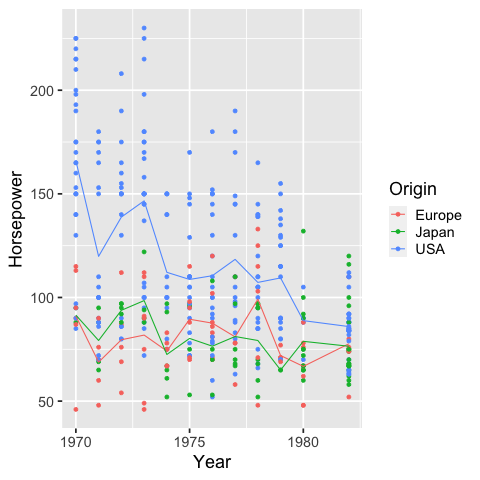

In [82]:
%%R -i cars
# using mean 

ggplot(cars) +
    aes(x = Year,
        y = Horsepower,
        color = Origin) +
    geom_point() +
    geom_line(stat = 'summary', fun = 'mean')

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



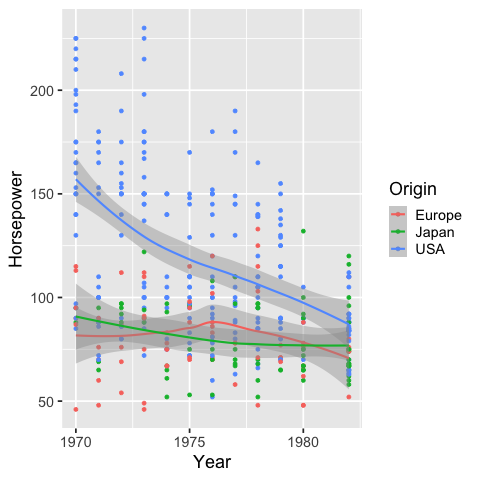

In [83]:
%%R -i cars
# loess
ggplot(cars) +
    aes(x = Year,
        y = Horsepower,
        color = Origin) +
    geom_point() +
    geom_smooth(span = 1) # se = FALSE removes the error band of the trend line 
                          # span - alter how sensitive the loess fit is to local variation.

R[write to console]: `geom_smooth()` using formula 'y ~ x'



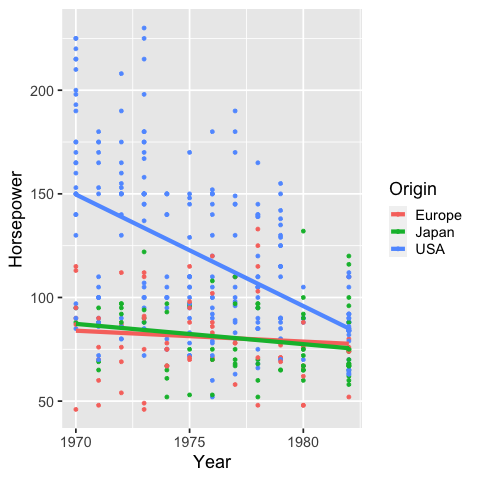

In [84]:
%%R
# linear regression
ggplot(cars) +
    aes(x = Year,
        y = Horsepower,
        color = Origin,
        fill = Origin) +
    geom_point() +
    geom_smooth(se = FALSE, size = 2, method = 'lm')

### 3. Create and understand how to interpret confidence intervals and confidence bands.

#### 3.1 Error band

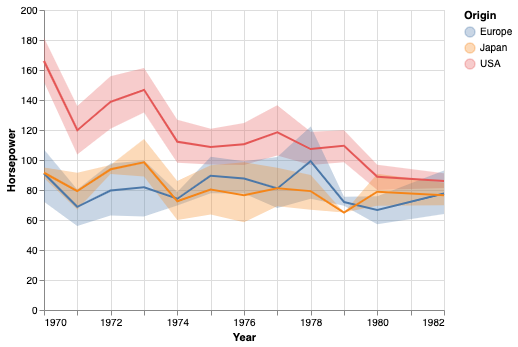

In [85]:
points.mark_errorband(extent='ci') + points.encode(y='mean(Horsepower)').mark_line()

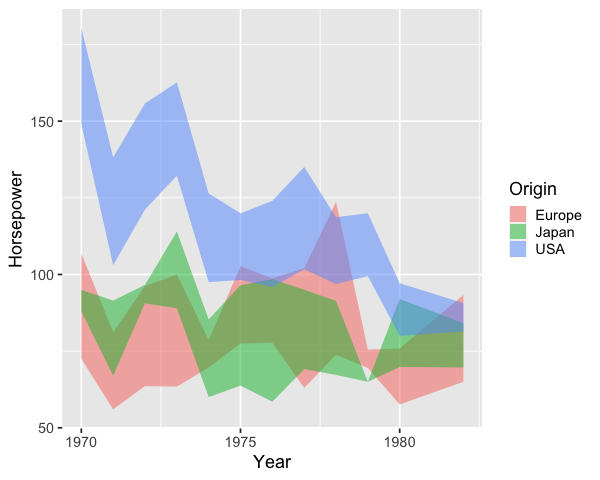

In [86]:
%%R -w 600
ggplot(cars) +
    aes(x = Year,
        y = Horsepower,
        color = Origin,
        fill = Origin) +
    geom_ribbon(stat = 'summary', fun.data = mean_cl_boot, alpha=0.5, color = NA)
    # `color = NA` removes the ymin/ymax lines and shows only the shaded filled area

#### 3.2. Error bars + ticks

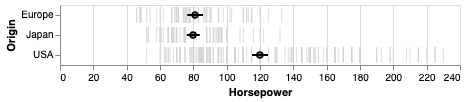

In [87]:
err_bars = alt.Chart(cars).mark_errorbar(extent='ci', rule=alt.LineConfig(size=2)).encode(
    x='Horsepower',
    y='Origin')

(err_bars.mark_tick(color='lightgrey')
 + err_bars
 + err_bars.mark_point(color='black').encode(x='mean(Horsepower)'))   # needs to specify the point estimates

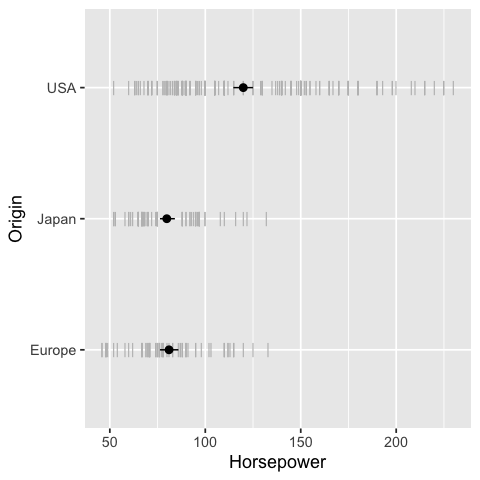

In [88]:
%%R
ggplot(cars) +
    aes(x = Horsepower,
        y = Origin) +
    geom_point(shape = '|', color='grey', size=5) +   # add ticks
    geom_pointrange(stat = 'summary', fun.data = mean_cl_boot, size = 0.7)  # error bars and the point estimates

### Lecture 8

#### Required readings

#### 29 Telling a story and making a point

- Goal in telling a story: use facts and logical reasoning to get your audience interested and excited.
- A story is a set of observations, facts, or events, true or invented, that are presented in a specific order such that they create an emotional reaction in the audience.
- Format:
    - Opening-Challenge-Action-Resolution
    - Lead-Development-Resolution (ex. newspaper)
    - Action-Background=Development-Climax-Ending
- Single visualization will rarely tell an entire story
    - To tell a complete story, we will usually need multiple visualizations.
- We need to do everything we can to help our readers understand the meaning of our visualizations and see the same patterns in the data that we see.
    - Simplify your figures as much as possible.
    - When you're trying to show too much data at once you may end up not showing anything.
    - Show the simplified one before showing the complex one.
- Make your figures memorable
    - Strike a balance between the two extremes and make our figures both memorable and clear
    - isotype plots: logo-like simplified pictograms that represent objects, animals, plants or people.
- Be consistent but don't be repetitive
    - It is important that figures describing different analyses look visually distinct.
    - Aim to use a different type of visualization for each distinct analysis.

#### 1. Layout plots in panels of a figure gird

##### 1.1. Figure composition - Altair

In [89]:
mpg_weight = alt.Chart(cars, title='x = mpg').mark_point().encode(
    x=alt.X('Miles_per_Gallon'),
    y=alt.Y('Weight_in_lbs'),
    color='Origin')

hp_weight = alt.Chart(cars, title='x = hp').mark_point().encode(
    x=alt.X('Horsepower'),
    y=alt.Y('Weight_in_lbs'),
    color='Origin')

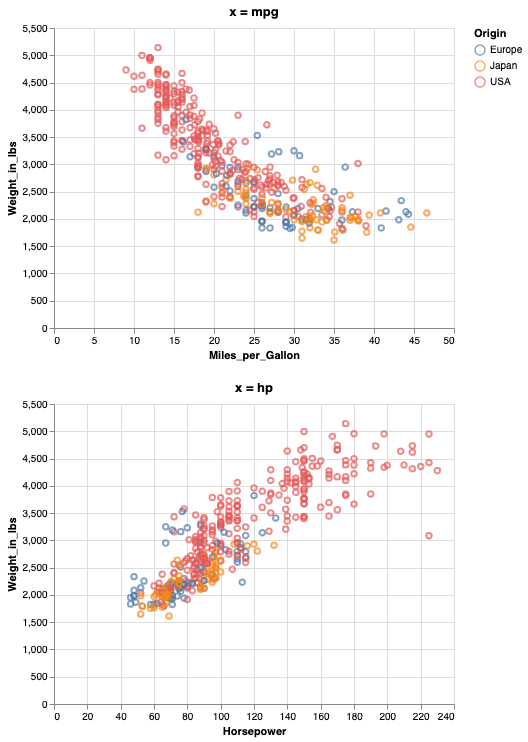

In [90]:
# Concatenate vertically
mpg_weight & hp_weight

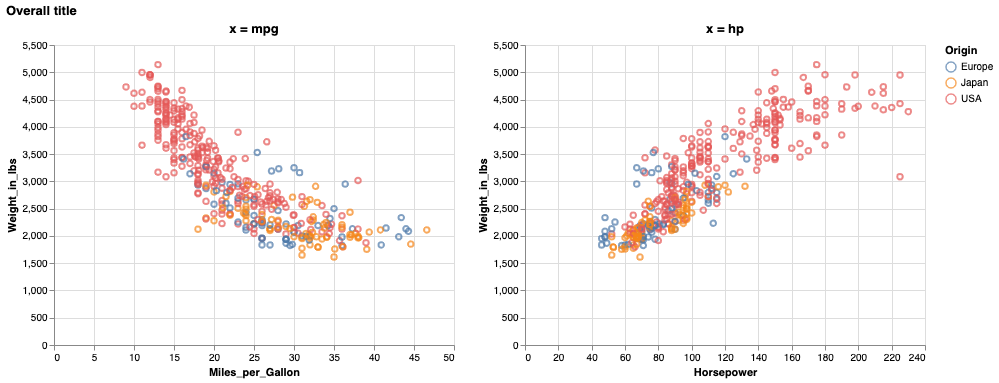

In [91]:
# concatenate horizontally with title
(mpg_weight | hp_weight).properties(title='Overall title')

In [92]:
mpg_hist = alt.Chart(cars).mark_bar().encode(
    alt.X('Miles_per_Gallon', bin=True),
    y='count()').properties(height=100)

weight_ticks = alt.Chart(cars).mark_tick().encode( 
    x='Origin',
    y='Weight_in_lbs',
    color='Origin')

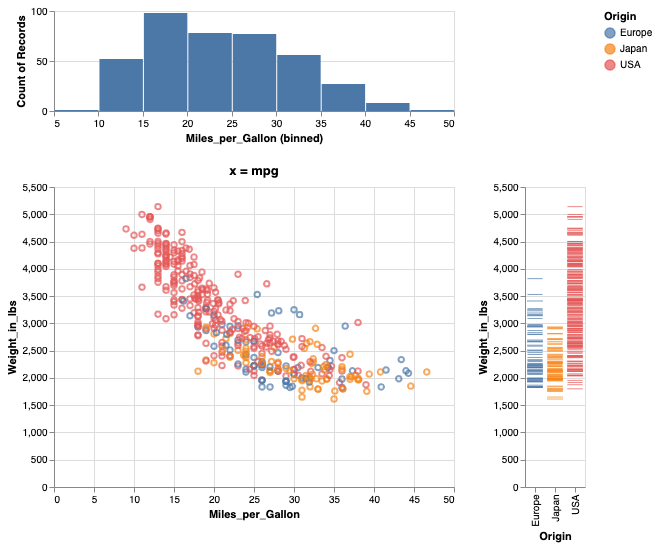

In [93]:
# Concatenate more than two plots with paraenthesis
mpg_hist & (mpg_weight | weight_ticks)

##### 1.2. Figure composition - ggplot

In [94]:
%%R -i cars
mpg_weight <- ggplot(cars) +
    aes(x = Miles_per_Gallon,
        y = Weight_in_lbs,
        color = Origin) +
    geom_point()

In [95]:
%%R -i cars
hp_weight <- ggplot(cars) +
    aes(x = Horsepower,
        y = Weight_in_lbs,
        color = Origin) +
    geom_point()

In [96]:
%%R -w 200
origin_count <- ggplot(cars) +
    aes(x = Origin) +
    geom_bar()

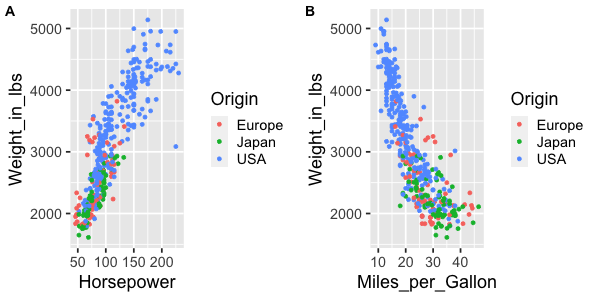

In [97]:
%%R -w 600 -h 300
library(cowplot)
plot_grid(hp_weight, mpg_weight, labels='AUTO')   # to concatenate vertically, set ncol = 1

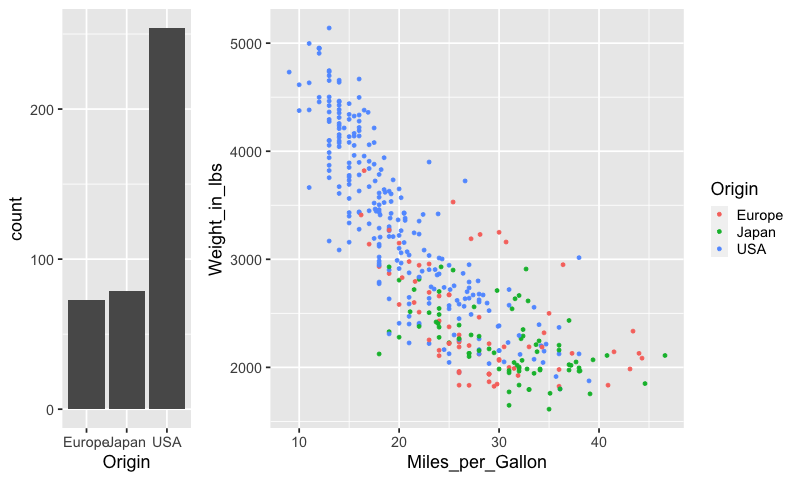

In [98]:
%%R -w 800
plot_grid(origin_count, mpg_weight, rel_widths=c(1, 3))   # concatenate plots with relative widths

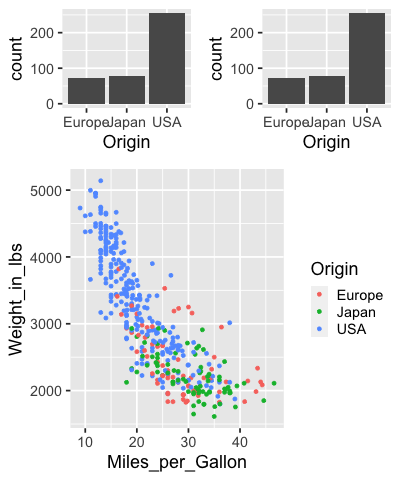

In [99]:
%%R -w 400
top_row <- plot_grid(origin_count, origin_count)
plot_grid(top_row, mpg_weight, ncol=1, rel_heights=c(1,2))   # nest the plot grid within each other

#### 2. Save figures outside the notebook

##### 2.1. Altair

In [100]:
combo = mpg_hist & (mpg_weight | weight_ticks)
combo.save('combo.html') # html
combo.save('combo.png')  # png
combo.save('combo-hires.png', scale_factor=3) # control resolution

TypeError: Cannot read property 'getContext' of null
    at resize (/opt/miniconda3/envs/531/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:3377:26)
    at CanvasRenderer.prototype$6.resize (/opt/miniconda3/envs/531/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:3427:5)
    at CanvasRenderer.prototype$4.initialize (/opt/miniconda3/envs/531/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:2989:17)
    at CanvasRenderer.prototype$6.initialize (/opt/miniconda3/envs/531/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:3422:28)
    at initializeRenderer (/opt/miniconda3/envs/531/lib/vega-cli/node_modules/vega-view/build/vega-view.js:630:8)
    at renderHeadless (/opt/miniconda3/envs/531/lib/vega-cli/node_modules/vega-view/build/vega-view.js:736:12)
    at processTicksAndRejections (internal/process/task_queues.js:93:5)
    at async View.renderToCanvas [as toCanvas] (/opt/miniconda3/envs/531/lib/vega-cli/node_modules

##### 2.2. ggplot

In [ ]:
%%R
grid <- plot_grid(top_row, mpg_weight, ncol=1)
ggsave('grid.png')              # save the most recent one
ggsave('grid.png', grid)        # specify which figure to save
ggsave('grid2.png', dpi=96)     # set the dpi controls
ggsave('grid2.pdf')             # save to PDF

#### 3. Understand figure formats in the notebook.

When we save figures
- JSON file : automatically created by 'data server'
    - `alt.data_transformers.enable('data_server')`
    - create the files in the local computer and refer to it in the notebook.
    - temporary file
    - if you don't run this line, the size of the notebook will be large.
- `alt.renderers.enable('mimetype')`
    - use the default Vega way of showing plots, and also back up in PNG file for every plot you make.
    - encode the imgs in text string
- In ggplot, it only saves images in text strings.

#### 4. Retrieve info on further topics online.

- Documentation
    - Altair documentation
    - Example gallery
    - ggplot2 documentation
- Online: google, stack overflow...
- Github issues
    - Altair, vega-lite... 
- R studio forum, R studio community